# 10 · Ruido y Filtros (Gaussiano & Sal y Pimienta)

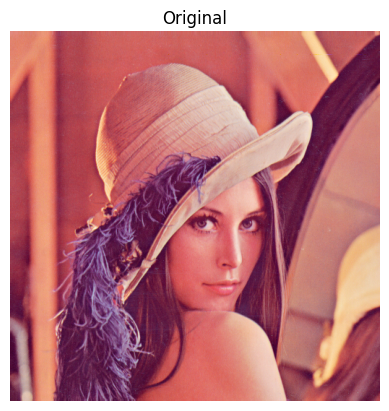

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

IMG_PATH = r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png"
img_bgr = cv2.imread(IMG_PATH)
if img_bgr is None:
    raise FileNotFoundError("No se encontró la imagen. Ajusta IMG_PATH.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.title("Original"); plt.axis("off"); plt.show()

In [2]:
def add_gaussian_noise(img, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy = img.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

def add_salt_pepper(img, prob=0.02):
    noisy = img.copy()
    h, w, c = img.shape
    mask = np.random.rand(h, w)
    for ch in range(c):
        ch_data = noisy[..., ch]
        ch_data[mask < prob/2] = 0
        ch_data[mask > 1 - prob/2] = 255
        noisy[..., ch] = ch_data
    return noisy

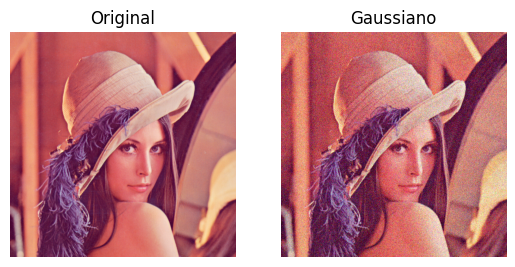

In [3]:
# Ruido Gaussiano
noisy_gauss = add_gaussian_noise(img_rgb, sigma=25)
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(noisy_gauss); plt.title("Gaussiano"); plt.axis("off")
plt.show()

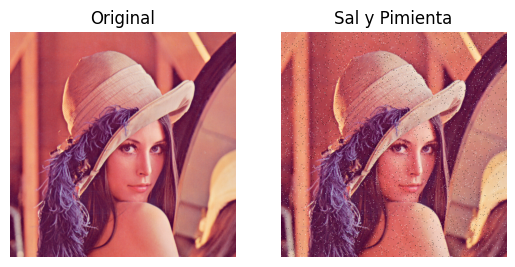

In [4]:
# Ruido Sal y Pimienta
noisy_sp = add_salt_pepper(img_rgb, prob=0.02)
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(noisy_sp); plt.title("Sal y Pimienta"); plt.axis("off")
plt.show()

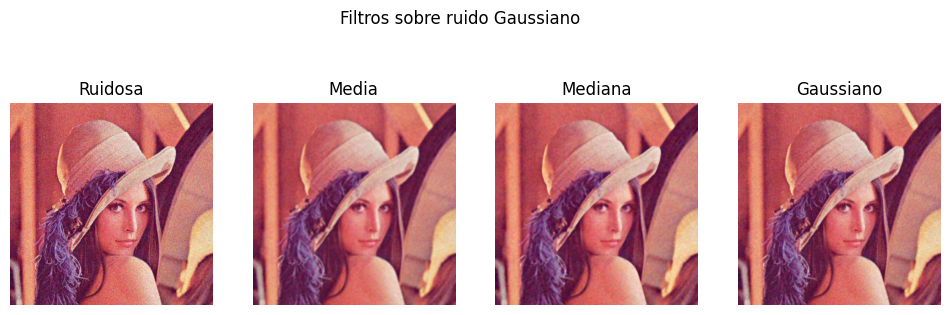

In [5]:
# Filtros sobre ruido Gaussiano
k = 5
mean_blur  = cv2.blur(noisy_gauss, (k,k))
median_blur= cv2.medianBlur(noisy_gauss, k)
gauss_blur = cv2.GaussianBlur(noisy_gauss, (k,k), 1.0)

titles = ["Ruidosa","Media","Mediana","Gaussiano"]
imgs   = [noisy_gauss, mean_blur, median_blur, gauss_blur]
plt.figure(figsize=(12,4))
for i,(im,tt) in enumerate(zip(imgs,titles),1):
    plt.subplot(1,4,i); plt.imshow(im); plt.title(tt); plt.axis("off")
plt.suptitle("Filtros sobre ruido Gaussiano"); plt.show()

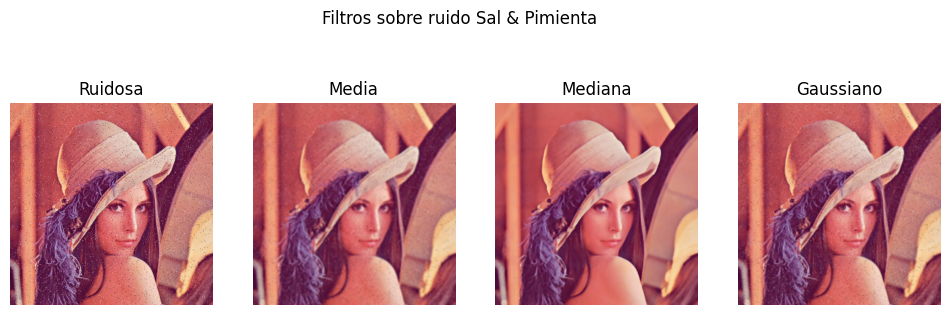

In [6]:
# Filtros sobre ruido Sal y Pimienta
mean_blur_sp  = cv2.blur(noisy_sp, (k,k))
median_blur_sp= cv2.medianBlur(noisy_sp, k)
gauss_blur_sp = cv2.GaussianBlur(noisy_sp, (k,k), 1.0)

titles = ["Ruidosa","Media","Mediana","Gaussiano"]
imgs   = [noisy_sp, mean_blur_sp, median_blur_sp, gauss_blur_sp]
plt.figure(figsize=(12,4))
for i,(im,tt) in enumerate(zip(imgs,titles),1):
    plt.subplot(1,4,i); plt.imshow(im); plt.title(tt); plt.axis("off")
plt.suptitle("Filtros sobre ruido Sal & Pimienta"); plt.show()